In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataframe = pd.read_csv("C:/Users/iamso/Documents/CITK/Major_Project/encoded_dataset.csv")
dataframe.head()

,list,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,Whitelist,211456,2.231824,447,496,628,654,695,206,702,303,687,51,315,866,950,96,152,509,645
1,Whitelist,17584,6.143784,414,499,642,539,412,283,62,307,459,45,304,257,651,565,34,34,750
2,Whitelist,47104,5.694129,952,576,12,713,264,373,228,253,825,866,373,93,862,513,770,14,812
3,Whitelist,242816,3.918845,932,309,403,542,335,602,437,270,162,656,959,55,84,854,575,433,431
4,Whitelist,119240,6.168794,264,876,545,379,985,773,876,61,781,919,922,164,594,138,842,484,884


In [5]:
dataframe.shape

(201549, 20)

In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from fcmeans import FCM
from sklearn.preprocessing import StandardScaler

In [7]:
df = dataframe[dataframe['list'] == 'Blacklist']
df.reset_index(drop=True, inplace=True)
df

,list,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,Blacklist,71168,4.699615,300,882,545,610,796,786,285,406,849,932,677,71,145,26,511,838,850
1,Blacklist,602112,6.255951,7,516,323,571,333,893,471,146,40,955,368,628,560,381,678,803,197
2,Blacklist,3020256,6.428692,239,753,30,42,678,366,24,391,284,496,208,86,925,374,238,873,232
3,Blacklist,559864,6.928873,821,1004,8,112,478,715,877,417,173,305,420,547,324,665,331,357,745
4,Blacklist,106496,6.054325,980,85,529,821,453,630,899,459,217,393,804,846,435,537,111,369,633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114732,Blacklist,764928,7.885477,932,674,559,340,325,708,748,15,932,246,273,579,457,407,270,335,971
114733,Blacklist,710144,7.952831,118,19,422,795,350,389,903,62,62,742,979,836,647,397,706,873,70
114734,Blacklist,637200,6.883626,936,277,370,640,39,112,401,890,522,79,607,880,231,693,367,729,260
114735,Blacklist,1013904,6.677207,828,241,714,823,365,905,614,1003,98,602,1,897,956,265,73,851,824


In [8]:
df.shape

(114737, 20)

In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114737 entries, 0 to 114736
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   list         114737 non-null  object 
 1   length       114737 non-null  int64  
 2   entropy      114737 non-null  float64
 3   md5_int1     114737 non-null  int64  
 4   md5_int2     114737 non-null  int64  
 5   md5_int3     114737 non-null  int64  
 6   md5_int4     114737 non-null  int64  
 7   sha1_int1    114737 non-null  int64  
 8   sha1_int2    114737 non-null  int64  
 9   sha1_int3    114737 non-null  int64  
 10  sha1_int4    114737 non-null  int64  
 11  sha1_int5    114737 non-null  int64  
 12  sha256_int1  114737 non-null  int64  
 13  sha256_int2  114737 non-null  int64  
 14  sha256_int3  114737 non-null  int64  
 15  sha256_int4  114737 non-null  int64  
 16  sha256_int5  114737 non-null  int64  
 17  sha256_int6  114737 non-null  int64  
 18  sha256_int7  114737 non-

,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
count,1.147370e+05,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.00000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000,114737.000000
mean,7.361402e+05,6.737332,503.848645,503.423882,504.601977,502.348606,503.952936,503.215092,502.070544,504.459154,504.22013,505.301969,503.245832,505.771460,504.060024,504.370578,504.022050,503.775513,504.067685
std,1.267221e+06,1.190021,290.664719,291.658407,291.532592,290.361301,290.723671,291.494576,291.674954,291.334308,291.24052,291.214394,291.212942,291.173584,291.197651,291.465275,291.361439,291.221004,290.815958
min,5.120000e+02,0.005894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.263360e+05,6.243894,253.000000,251.000000,252.000000,252.000000,253.000000,251.000000,249.000000,252.000000,252.00000,253.000000,252.000000,253.000000,253.000000,251.000000,251.000000,252.000000,252.000000
50%,3.237200e+05,6.920258,503.000000,503.000000,506.000000,501.000000,505.000000,503.000000,501.000000,505.000000,505.00000,506.000000,502.000000,507.000000,504.000000,505.000000,504.000000,503.000000,505.000000
75%,7.429490e+05,7.690613,754.000000,757.000000,757.000000,753.000000,755.000000,755.000000,754.000000,756.000000,757.00000,757.000000,755.000000,758.000000,755.000000,757.000000,757.000000,755.000000,755.000000
max,4.198810e+07,7.999952,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.00000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000


In [10]:
df['list'].unique()

array(['Blacklist'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['list'])
le.transform(df['list'])
df['list'] = le.transform(df['list'])
df

,list,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,0,71168,4.699615,300,882,545,610,796,786,285,406,849,932,677,71,145,26,511,838,850
1,0,602112,6.255951,7,516,323,571,333,893,471,146,40,955,368,628,560,381,678,803,197
2,0,3020256,6.428692,239,753,30,42,678,366,24,391,284,496,208,86,925,374,238,873,232
3,0,559864,6.928873,821,1004,8,112,478,715,877,417,173,305,420,547,324,665,331,357,745
4,0,106496,6.054325,980,85,529,821,453,630,899,459,217,393,804,846,435,537,111,369,633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114732,0,764928,7.885477,932,674,559,340,325,708,748,15,932,246,273,579,457,407,270,335,971
114733,0,710144,7.952831,118,19,422,795,350,389,903,62,62,742,979,836,647,397,706,873,70
114734,0,637200,6.883626,936,277,370,640,39,112,401,890,522,79,607,880,231,693,367,729,260
114735,0,1013904,6.677207,828,241,714,823,365,905,614,1003,98,602,1,897,956,265,73,851,824


In [12]:
y = df[['list']]
y

,list
0,0
1,0
2,0
3,0
4,0
...,...
114732,0
114733,0
114734,0
114735,0


In [13]:
data = df.drop(['list'], axis=1)
data

,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,71168,4.699615,300,882,545,610,796,786,285,406,849,932,677,71,145,26,511,838,850
1,602112,6.255951,7,516,323,571,333,893,471,146,40,955,368,628,560,381,678,803,197
2,3020256,6.428692,239,753,30,42,678,366,24,391,284,496,208,86,925,374,238,873,232
3,559864,6.928873,821,1004,8,112,478,715,877,417,173,305,420,547,324,665,331,357,745
4,106496,6.054325,980,85,529,821,453,630,899,459,217,393,804,846,435,537,111,369,633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114732,764928,7.885477,932,674,559,340,325,708,748,15,932,246,273,579,457,407,270,335,971
114733,710144,7.952831,118,19,422,795,350,389,903,62,62,742,979,836,647,397,706,873,70
114734,637200,6.883626,936,277,370,640,39,112,401,890,522,79,607,880,231,693,367,729,260
114735,1013904,6.677207,828,241,714,823,365,905,614,1003,98,602,1,897,956,265,73,851,824


In [14]:
data = data[['length', 'entropy', 'sha1_int3']]
data

,length,entropy,sha1_int3
0,71168,4.699615,285
1,602112,6.255951,471
2,3020256,6.428692,24
3,559864,6.928873,877
4,106496,6.054325,899
...,...,...,...
114732,764928,7.885477,748
114733,710144,7.952831,903
114734,637200,6.883626,401
114735,1013904,6.677207,614


In [15]:
feature_names = np.array(data.columns)
feature_names

array(['length', 'entropy', 'sha1_int3'], dtype=object)

In [16]:
scalarModel = StandardScaler()
data = scalarModel.fit_transform(data)

In [17]:
data

array([[-0.52475067, -1.71234454, -0.74422396],
       [-0.10576591, -0.40451644, -0.10652502],
       [ 1.80246827, -0.25935785, -1.63905958],
       ...,
       [-0.07807685,  0.12293457, -0.34651924],
       [ 0.21919223, -0.05052448,  0.3837489 ],
       [ 1.58018643,  0.76849916, -1.41277931]])

In [18]:
dataset = pd.DataFrame(data, columns=feature_names)
dataset

,length,entropy,sha1_int3
0,-0.524751,-1.712345,-0.744224
1,-0.105766,-0.404516,-0.106525
2,1.802468,-0.259358,-1.639060
3,-0.139105,0.160957,1.285442
4,-0.496872,-0.573948,1.360868
...,...,...,...
114732,0.022717,0.964815,0.843166
114733,-0.020514,1.021414,1.374582
114734,-0.078077,0.122935,-0.346519
114735,0.219192,-0.050524,0.383749


In [19]:
dataset = dataset.values
dataset

array([[-0.52475067, -1.71234454, -0.74422396],
       [-0.10576591, -0.40451644, -0.10652502],
       [ 1.80246827, -0.25935785, -1.63905958],
       ...,
       [-0.07807685,  0.12293457, -0.34651924],
       [ 0.21919223, -0.05052448,  0.3837489 ],
       [ 1.58018643,  0.76849916, -1.41277931]])

In [20]:
# Initialise an object fcm by calling a method FCM
fcmModel = FCM(n_clusters = 4)

In [21]:
# fit the fuzzy-c-means
fcmModel.fit(dataset)

In [22]:
# outputs are stored fcm_centers and fcm_labels
center = fcmModel.centers

In [23]:
center

array([[-0.09887692, -0.6406159 ,  0.74355322],
       [-0.11174694, -0.64186793, -0.75236718],
       [-0.12195933,  0.58533328, -0.8723881 ],
       [-0.12154891,  0.58223688,  0.888013  ]])

In [24]:
# argmax: Returns the indices of the maximum values along an axis.
fcm_label = fcmModel.u.argmax(axis = 1)

In [25]:
fcm_label

array([1, 1, 1, ..., 2, 0, 2], dtype=int64)

In [26]:
pred = fcmModel.predict(dataset)
print('Predicted Value for fcmModel is : ' , pred)
pred.shape

Predicted Value for fcmModel is :  [1 1 1 ... 2 0 2]


(114737,)

In [27]:
dataset = pd.DataFrame(dataset, columns=feature_names)
dataset

,length,entropy,sha1_int3
0,-0.524751,-1.712345,-0.744224
1,-0.105766,-0.404516,-0.106525
2,1.802468,-0.259358,-1.639060
3,-0.139105,0.160957,1.285442
4,-0.496872,-0.573948,1.360868
...,...,...,...
114732,0.022717,0.964815,0.843166
114733,-0.020514,1.021414,1.374582
114734,-0.078077,0.122935,-0.346519
114735,0.219192,-0.050524,0.383749


In [28]:
dataset['cluster'] = pred
dataset.head()

,length,entropy,sha1_int3,cluster
0,-0.524751,-1.712345,-0.744224,1
1,-0.105766,-0.404516,-0.106525,1
2,1.802468,-0.259358,-1.639060,1
3,-0.139105,0.160957,1.285442,3
4,-0.496872,-0.573948,1.360868,0


In [29]:
dataset = pd.concat([dataset, y], axis = 1)
dataset

,length,entropy,sha1_int3,cluster,list
0,-0.524751,-1.712345,-0.744224,1,0
1,-0.105766,-0.404516,-0.106525,1,0
2,1.802468,-0.259358,-1.639060,1,0
3,-0.139105,0.160957,1.285442,3,0
4,-0.496872,-0.573948,1.360868,0,0
...,...,...,...,...,...
114732,0.022717,0.964815,0.843166,3,0
114733,-0.020514,1.021414,1.374582,3,0
114734,-0.078077,0.122935,-0.346519,2,0
114735,0.219192,-0.050524,0.383749,0,0


In [30]:
unique, counts = np.unique(fcm_label, return_counts=True)
counts = counts.reshape(1,4)


countscldf = pd.DataFrame(counts, columns= ['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3'])


countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,24861,25061,32496,32319


In [31]:
from sklearn.metrics import silhouette_score
silh_score_fcm = silhouette_score(dataset, fcm_label)
print('Silhoette Coefficient:',  silh_score_fcm)

Silhoette Coefficient: 0.4104879013492206


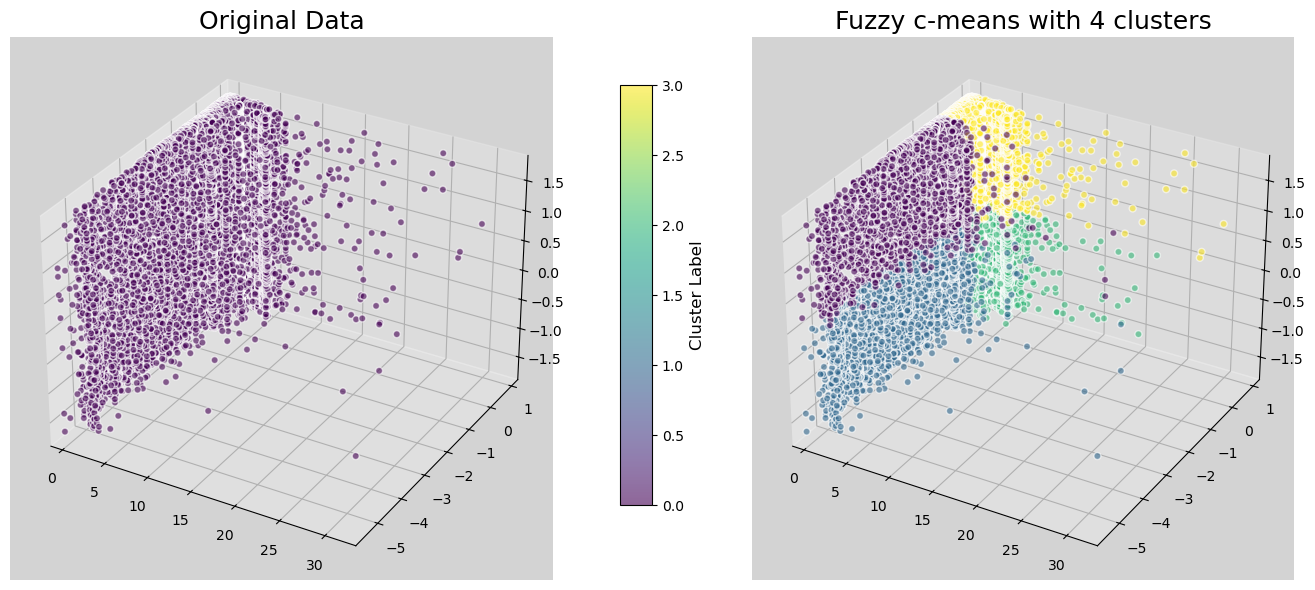

In [32]:
plt.figure(figsize=(16, 6)) 

# Original Data Scatter Plot
ax1 = plt.subplot(1, 2, 1, projection='3d')
scatter1 = ax1.scatter(dataset['length'], dataset['entropy'], dataset['sha1_int3'], c=dataset['list'], cmap='viridis', marker='o', alpha=0.6, edgecolors='w', s=25)
ax1.set_title('Original Data', fontsize=18, loc='center')
# ax1.set_xlabel('Length', fontsize=10)
# ax1.set_ylabel('Entropy', fontsize=10)
# ax1.set_zlabel('sha1_int3', fontsize=10)
ax1.grid(color='gray', linestyle='-', linewidth=0.5)
ax1.set_facecolor('lightgray')  # Set background color

# Fuzzy c-means Scatter Plot
ax2 = plt.subplot(1, 2, 2, projection='3d')
scatter2 = ax2.scatter(dataset['length'], dataset['entropy'], dataset['sha1_int3'], c=dataset['cluster'], cmap='viridis', marker='o', alpha=0.6, edgecolors='w', s=25)
ax2.set_title('Fuzzy c-means with 4 clusters', fontsize=18, loc='center')
# ax2.set_xlabel('Length', fontsize=10)
# ax2.set_ylabel('Entropy', fontsize=10)
# ax2.set_zlabel('sha1_int3', fontsize=10)
ax2.grid(color='gray', linestyle='-', linewidth=0.5)
ax2.set_facecolor('lightgray')  # Set background color

# Adjusting scaling
ax1.set_xlim(dataset['length'].min() - 0.1, dataset['length'].max() + 0.1)
ax1.set_ylim(dataset['entropy'].min() - 0.1, dataset['entropy'].max() + 0.1)
ax1.set_zlim(dataset['sha1_int3'].min() - 0.1, dataset['sha1_int3'].max() + 0.1)

ax2.set_xlim(dataset['length'].min() - 0.1, dataset['length'].max() + 0.1)
ax2.set_ylim(dataset['entropy'].min() - 0.1, dataset['entropy'].max() + 0.1)
ax2.set_zlim(dataset['sha1_int3'].min() - 0.1, dataset['sha1_int3'].max() + 0.1)

# Adding colorbar between plots
cbar_ax = plt.gcf().add_axes([0.48, 0.15, 0.02, 0.7])  # [x_position, y_position, width, height]
cbar = plt.colorbar(scatter2, cax=cbar_ax)
cbar.set_label('Cluster Label', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
plt.scatter(dataset[pred == 0, 0], dataset[pred == 0, 1], s = 10, c = 'r')
plt.scatter(dataset[pred == 1, 0], dataset[pred == 1, 1], s = 10, c = 'b' )
plt.scatter(center[:, 0], center[:, 1], s = 300, c = 'black',marker = '+')
plt.title('Clusters')
plt.xlabel('X_label ')
plt.ylabel('y_label ')
plt.legend()
plt.show()

In [ ]:
import skfuzzy as fuzz

In [ ]:
m, k, max_iter = 2, 4, 100

In [ ]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    dataset.T, k, m, error=0.005, maxiter=max_iter, init=None
)

In [ ]:
colors = ['b', 'g', 'r', 'c']
labels = np.argmax(u, axis=0)
for i in range(k):
    plt.scatter(dataset[labels == i, 0], dataset[labels == i, 1], c=colors[i], label=f'Cluster {i}')

plt.scatter(cntr[:, 0], cntr[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('duration')
plt.ylabel('ts')
plt.title('Fuzzy C-means Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
features = ['PartOfAHorizontalPortScan', 'Okiru', 'DDoS', 'C&C-HeartBeat',
            'C&C-Torii', 'C&C', 'Attack', 'C&C-FileDownload', 'FileDownload',
            'C&C-HeartBeat-FileDownload', 'C&C-Mirai']

In [ ]:
num_features = len(feature_names)
fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

for i in range(num_features):
    for j in range(num_features):
        ax = axes[i, j]
        ax.scatter(dataset[:, i], dataset[:, j], c=np.argmax(u, axis=0), cmap='viridis', alpha=0.5)
        ax.scatter(cntr[:, i], cntr[:, j], marker='*', s=200, c='black')
        ax.set_xlabel(features[i])
        ax.set_ylabel(features[j])
        ax.grid(True)

plt.tight_layout()
plt.show()